# Dataset Analysis

In [1]:
import cv2
import numpy as np

np.set_printoptions(linewidth=200)
image_data = cv2.imread(
    "/home/USER_NETWEAVER/project_netweaver/datasets/fashion_mnist_images/train/0/0000.png"
)
image_data_unchanged = cv2.imread(
    "/home/USER_NETWEAVER/project_netweaver/datasets/fashion_mnist_images/train/0/0000.png",
    cv2.IMREAD_UNCHANGED,
)

In [2]:
if image_data is not None and image_data_unchanged is not None:
    print(
        f"Data type of image_data: {type(image_data)}, "
        f"shape: {image_data.shape}, "
        f"dtype: {type(image_data[0][0][0])} "
        f"unit value: {image_data[0][11]}\n"
        f"Data type of image_data_unchanged: {type(image_data_unchanged)}, "
        f"shape: {image_data_unchanged.shape}, "
        f"dtype: {type(image_data_unchanged[0][0])} "
        f"unit value: {image_data_unchanged[0][11]}"
    )
else:
    print("One or both of the images could not be loaded. Please check the file paths.")

Data type of image_data: <class 'numpy.ndarray'>, shape: (28, 28, 3), dtype: <class 'numpy.uint8'> unit value: [188 188 188]
Data type of image_data_unchanged: <class 'numpy.ndarray'>, shape: (28, 28), dtype: <class 'numpy.uint8'> unit value: 188


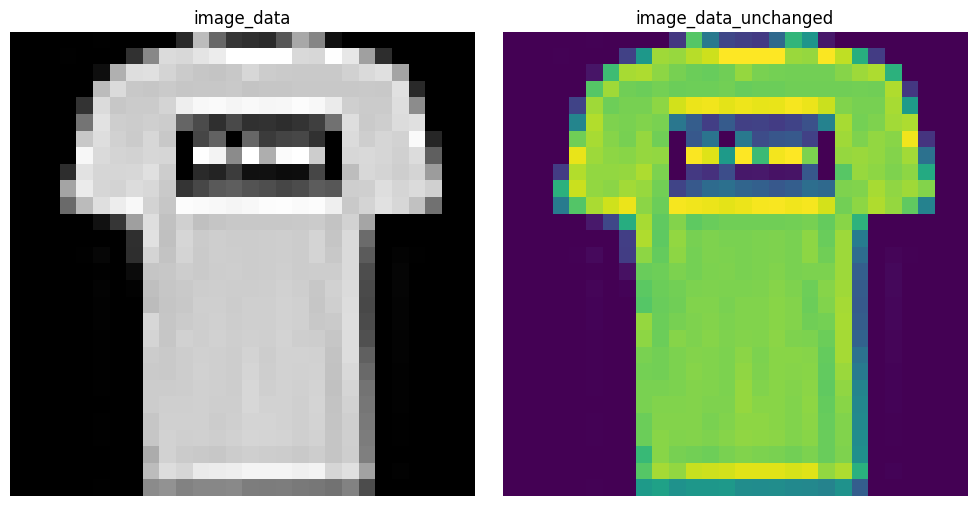

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_data)
axes[0].set_title("image_data")
axes[0].axis("off")

axes[1].imshow(image_data_unchanged)
axes[1].set_title("image_data_unchanged")
axes[1].axis("off")

plt.tight_layout()
plt.show()
print(image_data_unchanged)
# print(image_data)

# Dataset Preparation

In [4]:
import sys

print(*sys.path, sep="\n")

/home/USER_NETWEAVER/.local/share/uv/python/cpython-3.13.3-linux-x86_64-gnu/lib/python313.zip
/home/USER_NETWEAVER/.local/share/uv/python/cpython-3.13.3-linux-x86_64-gnu/lib/python3.13
/home/USER_NETWEAVER/.local/share/uv/python/cpython-3.13.3-linux-x86_64-gnu/lib/python3.13/lib-dynload

/home/USER_NETWEAVER/project_netweaver/.venv/lib/python3.13/site-packages
/home/USER_NETWEAVER/project_netweaver/src


In [5]:
from netweaver import create_data_mnist, download_fashion_mnist_dataset

## Download

In [6]:
project_root_path = "/home/USER_NETWEAVER/project_netweaver"
download_fashion_mnist_dataset(project_root_path)

Fashion_mnish_dataset is already available in /home/USER_NETWEAVER/project_netweaver/datasets/fashion_mnist_images


## Load into memory

In [7]:
dataset_path = "/home/USER_NETWEAVER/project_netweaver/datasets/fashion_mnist_images"
instances_train, gtruth_train, instances_test, gtruth_test = create_data_mnist(dataset_path)

Property                 | instances_train  gtruth_train     instances_test   gtruth_test      
-----------------------------------------------------------------------------------------------
instances count          | 60000            60000            10000            10000            
shape of the set         | (60000, 28, 28)  (60000,)         (10000, 28, 28)  (10000,)         
shape of an instance     | (28, 28)         (1,)             (28, 28)         (1,)             
Data type of unit        | float32          uint8            float32          uint8            
Total memory (gb)        | 0.17524          0.00006          0.02921          0.00001          


In [8]:
print(instances_train[0][14])
print(instances_test[0][14])

[  0.   0.   1.   3.   0.   3. 117. 112.  57.   0.   0.   0.   6. 101.  93. 115.   0.   0.   0.   0.   0.   1.   0.   0. 133. 152. 147.  58.]
[  1.   5.   0.   0.   0.  69. 253. 228. 178. 195. 191. 189. 220. 215. 114. 233. 226. 202. 207. 220. 202. 162. 155. 209. 237. 235. 251.  33.]


# Dataset Pre-processing

### Scaling

In [9]:
def scale_neg_pos_one(arr, maxvalue):
    max_half = maxvalue / 2
    return (arr - max_half) / max_half

def scale_zero_one(arr, maxvalue):
    return arr / maxvalue

In [10]:
maxvalue = instances_train.max()
instances_train = scale_neg_pos_one(instances_train, maxvalue)
instances_test = scale_neg_pos_one(instances_test, maxvalue)

### Flattening

In [11]:
instances_train = instances_train.reshape(instances_train.shape[0], -1)
instances_test = instances_test.reshape(instances_test.shape[0], -1)

In [12]:
print(instances_train.shape)
print(instances_test.shape)


(60000, 784)
(10000, 784)


### Shuffling

In [13]:
keys = np.array(range(instances_train.shape[0]))
rng = np.random.default_rng()
rng.shuffle(keys)

In [14]:
instances_train = instances_train[keys]
gtruth_train = gtruth_train[keys]

# Model Architecture

In [15]:
from netweaver import AccuracyCategorical, ActivationReLU, ActivationSoftmax, LayerDense, LossCategoricalCrossentropy, Model, OptimizerAdam

In [16]:
model = Model()

model.add(LayerDense(n_inputs=784, n_neurons=256))
model.add(ActivationReLU())
model.add(LayerDense(n_inputs=256, n_neurons=128))
model.add(ActivationReLU())
model.add(LayerDense(n_inputs=128, n_neurons=64))
model.add(ActivationReLU())
model.add(LayerDense(n_inputs=64, n_neurons=32))
model.add(ActivationReLU())
model.add(LayerDense(n_inputs=32, n_neurons=16))
model.add(ActivationReLU())
model.add(LayerDense(n_inputs=16, n_neurons=10))
model.add(ActivationSoftmax())

model.set(loss=LossCategoricalCrossentropy(), optimizer=OptimizerAdam(), accuracy=AccuracyCategorical())

In [17]:
model.finalize()

In [18]:
model.train(instances_train=instances_train, gtruth_train=gtruth_train, epochs=50, batch_size=128)

Epoch Log: /home/USER_NETWEAVER/project_netweaver/notebooks/logs/model_training/model-20250515-092132/Log-epoch-20250515-092132.csv
Batch Log: /home/USER_NETWEAVER/project_netweaver/notebooks/logs/model_training/model-20250515-092132/Log-batch-20250515-092132.csv


Traning:   0%|          | 0/50 [00:00<?, ?epoch/s]

Epoch 1:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 2:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 3:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 4:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 5:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 6:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 7:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 8:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 9:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 10:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 11:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 12:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 13:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 14:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 15:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 16:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 17:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 18:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 19:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 20:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 21:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 22:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 23:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 24:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 25:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 26:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 27:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 28:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 29:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 30:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 31:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 32:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 33:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 34:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 35:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 36:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 37:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 38:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 39:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 40:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 41:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 42:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 43:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 44:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 45:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 46:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 47:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 48:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 49:   0%|          | 0/469 [00:00<?, ?batch/s]

Epoch 50:   0%|          | 0/469 [00:00<?, ?batch/s]

In [19]:
model.save_parameters()

params saved successfully
pickle file: /home/USER_NETWEAVER/project_netweaver/notebooks/logs/model_training/model-20250515-092132/params-pkl-20250515-092132.pkl
